<a href="https://colab.research.google.com/github/sugimotoh/seminar2018/blob/master/KAWANO20190621.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
pip install selenium

     |████████████████████████████████| 911kB 5.0MB/s 


In [4]:
pip install beautifulsoup4

In [5]:
pip install requests

In [0]:
import requests
from bs4 import BeautifulSoup
 
r = requests.get("https://www.mwed.jp/hall/11063/rev")
soup = BeautifulSoup(r.content, "html.parser")
# print(soup.find_all("p"))

In [4]:
pip install "https://github.com/megagonlabs/ginza/releases/download/v1.0.2/ja_ginza_nopn-1.0.2.tgz"

     |████████████████████████████████| 122.4MB 29.4MB/s 
     |████████████████████████████████| 27.7MB 1.7MB/s 
  Stored in directory: /root/.cache/pip/wheels/4e/ec/db/a4c22268bd4ca2e711284022ae0d55cc2244b9170a9033b438
Successfully built ja-ginza-nopn
  Found existing installation: spacy 2.1.4
    Uninstalling spacy-2.1.4:
      Successfully uninstalled spacy-2.1.4


In [0]:


pip install ja_ginza_nopn-1.0.2.tgz

Processing ./ja_ginza_nopn-1.0.2.tgz
ERROR: Could not install packages due to an EnvironmentError: [Errno 2] No such file or directory: '/content/ja_ginza_nopn-1.0.2.tgz'



In [5]:
pip install janome

**フォントのインストールが必要**

In [14]:
!apt-get -y install fonts-ipafont-gothic

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-410
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  fonts-ipafont-mincho
The following NEW packages will be installed:
  fonts-ipafont-gothic fonts-ipafont-mincho
0 upgraded, 2 newly installed, 0 to remove and 16 not upgraded.
Need to get 8,251 kB of archives.
After this operation, 28.7 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-ipafont-gothic all 00303-18ubuntu1 [3,526 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-ipafont-mincho all 00303-18ubuntu1 [4,725 kB]
Fetched 8,251 kB in 0s (30.4 MB/s)
Selecting previously unselected package fonts-ipafont-gothic.
(Reading database ... 130942 files and directories currently installed.)
Preparing to unpack .../fonts-ipafont-go

In [0]:
!ls /usr/share/fonts/opentype/ipafont-gothic/ipagp.ttf

/usr/share/fonts/opentype/ipafont-gothic/ipagp.ttf


**テキストの読み込みと前処理**

*   str関数による文字列への変換
*   replece関数によるごみの削除
*   str_data01として生成

In [18]:
data00 = soup.find_all("p")
str_data00 = str(data00)
str_data01 = str_data00.replace('</p>,', "").replace('\n', "").replace('[<p class="clrS fontSS pd10b">', "").replace('<p>ホテルニューオータニ博多　ブライダルスタッフ より</p>,', "").replace('b fontL あなたの疑問は解決しましたか？ わからない事があればこの式場に決めた先輩花嫁・花婿に相談してみましょう/', "").replace('class', "").replace('fltL', "").replace('fontS', "").replace('mg10t', "").replace('mg10b', "").replace('taC', "").replace('結婚式、披露宴を福岡で考えているお二人へ。「ホテルニューオータニ博多」は、福岡市エリアのホテルです。挙式や外観、会場内の写真から式場の雰囲気をつかんだら、先輩カップルが投稿した実際の費用と料金プランを見比べたり、結婚式場口コミで料理やスタッフ、進行演出、衣装や施設の評価をチェック。気になったら、ブライダルフェア・見学予約をして式場訪問してみましょう。', "").replace('ホテルニューオータニ博多', "").replace('あなたの疑問は解決しましたか？ わからない事があればこの式場に決めた先輩花嫁・花婿に相談してみましょう', "").replace('「', "").replace('」', "").replace('。', "").replace('、', "").replace('<', "").replace('>', "").replace('p', "").replace('=', "").replace('"', "")
str_data01

'     チャペルはﾎﾃﾙにしては安っぽく見え好みではありませんでした\r披露宴会場はホテルといった感じで落ち着いた雰囲気です\rウェルカムスペースが広いと案内されましたが広さに対して座るスペースがあま...     有名で昔からあるホテルなので古いのかと思っていましたが披露宴会場もチャペルもリニューアルされているからかとても綺麗でお洒落でしたエレベーターを降りてすぐのところに案内してくださる女性の方がいらして...     ホテル式場なのでロビー・チャペル・披露宴会場それぞれの落ち着いた雰囲気が素晴らしかったです会場内の飾りも１つ１つ品がありましたチャペルは広くゆったりと座ることができました あまり派手に誰...  b  この式場についてわからないことがある場合は先輩花嫁・花婿に相談してみましょう  lace-question-infeed-text ・提携ショップのドレスは種類多い？・装花のグレードはどれにしましたか？     100名で328万円でした内容的にはしっかりとライブエンドロールやプロフィールビデオ記念撮影２冊などが含まれているただし当日成約特典が40万円含まれていたので実際は370万円ほどになると思いま...     見積りについてはとてもわかりやすく説明してくださいますこの見積りに入っている装花代ならこの位のボリューム・雰囲気になりますと金額付きの写真を沢山見せていただきました今まで数件ブライダルフ...     私は和装洋装4着使用したので金額は上がりましたが平均的だと思います 豪華な雰囲気が私達の理想でしたなので素敵な披露宴会場で理想の演出ができました！またディズニーがイメージの私達の結婚式(...     ホテルウェディングですし必要なものはほとんど入れてもらったのでこれぐらいなのかなと思います1社目に行ったのでこれから回るところの見積もりが出てからまた費用の相談にのって頂けるそうで安くはなると思い...     老舗のホテルなので安定感のある挙式会場と披露宴会場でした設備は時折若干古い感じはありましたが全体的には満足です挙式会場はフロアに灯される青い光がとても幻想的でした披露宴会場は大人数でも対応...     ホテルでもあるので建物は広かったですが会場は迷いませんでしたまたチャペルは新しい印象でホテルウェディングのチャペルらしい所でし

In [0]:
from janome.tokenizer import Tokenizer
 

tok = Tokenizer()
tokens = tok.tokenize(str_data01)

In [0]:
words = ""
for token in tokens:
    if token.part_of_speech.split(',')[0] in ['名詞', '動詞', '形容詞', '副詞']:
        words = words + " " + token.base_form

stop_words = [u'する', u'ある', u'こと', u'いる', u'れる', u'思う'
             ,u'よう', u'やる', u'もの', u'lace', u'つく', u'Ｔステ']
fpath = "/Library/Fonts/ヒラギノ角ゴ Pro W3.otf"

In [21]:
from wordcloud import WordCloud
path = '-d /usr/lib/x86_64-linux-gnu/mecab/dic/mecab-ipadic-neologd'
print(path)
wordcloud = WordCloud(font_path='ipagp.ttf', 
                      background_color="white"
                      ,width=800
                      ,height=500
                      ,stopwords=set(stop_words)).generate(words)
wordcloud.to_file("./wordcloud_sample.png")

-d /usr/lib/x86_64-linux-gnu/mecab/dic/mecab-ipadic-neologd


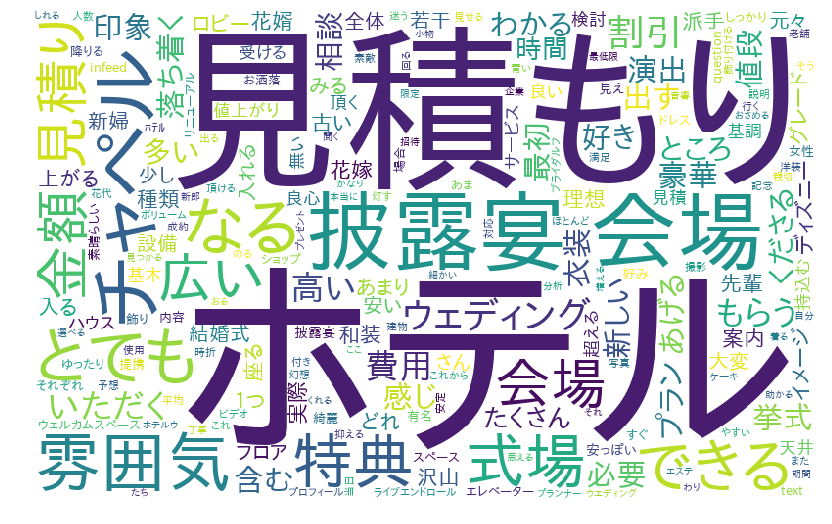

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,9))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()